In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [228]:
SAMPLES = 200
CATEGORIES = 6

d = np.random.randint(0, CATEGORIES, size=SAMPLES)
print(d)

In [235]:
X = np.zeros((CATEGORIES, SAMPLES))
for dim in range(CATEGORIES):
    X[dim, d==dim] = 1.
C = X.dot(X.T)
print(X)
Xm = X - np.repeat(np.mean(X, axis=1)[:, np.newaxis], SAMPLES, axis=1)
Cm = Xm.dot(Xm.T)
print(Xm)

print C,'\n', Cm

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  1.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]]
[[-0.135 -0.135 -0.135 ..., -0.135 -0.135 -0.135]
 [ 0.87  -0.13  -0.13  ...,  0.87  -0.13  -0.13 ]
 [-0.185 -0.185 -0.185 ..., -0.185 -0.185  0.815]
 [-0.19  -0.19   0.81  ..., -0.19  -0.19  -0.19 ]
 [-0.2    0.8   -0.2   ..., -0.2   -0.2   -0.2  ]
 [-0.16  -0.16  -0.16  ..., -0.16   0.84  -0.16 ]]
[[ 27.   0.   0.   0.   0.   0.]
 [  0.  26.   0.   0.   0.   0.]
 [  0.   0.  37.   0.   0.   0.]
 [  0.   0.   0.  38.   0.   0.]
 [  0.   0.   0.   0.  40.   0.]
 [  0.   0.   0.   0.   0.  32.]] 
[[ 23.355  -3.51   -4.995  -5.13   -5.4    -4.32 ]
 [ -3.51   22.62   -4.81   -4.94   -5.2    -4.16 ]
 [ -4.995  -4.81   30.155  -7.03   -7.4    -5.92 ]
 [ -5.13   -4.94   -7.03   30.78   -7.6    -6.08 ]
 [ -5.4    -5.2    -7.4    -7.6    32.     -6.4  ]
 [ -4.32   -4.16   -5.92   -6.08   -6.4    26.88 ]]

In [237]:
u, v = np.linalg.eig(C)
print u
print '\n'
for dim in range(DIM):
    print dim, ':', v[:, dim]

[ 27.  26.  37.  38.  40.  32.]


0 : [ 1.  0.  0.  0.  0.  0.]
1 : [ 0.  1.  0.  0.  0.  0.]
2 : [ 0.  0.  1.  0.  0.  0.]
3 : [ 0.  0.  0.  1.  0.  0.]
4 : [ 0.  0.  0.  0.  1.  0.]
5 : [ 0.  0.  0.  0.  0.  1.]


In [242]:
u, v = np.linalg.eig(Cm)
for dim in range(DIM):
    print dim, ': {0:1.1f} = '.format(u[dim]), v[:, dim]
print ''
print v.dot(np.diag(u).dot(v.T))
print '\n'
R = v[:,[4,5]].T.dot(Xm)
print np.unique(R)

0 : 0.0 =  [-0.40824829 -0.40824829 -0.40824829 -0.40824829 -0.40824829 -0.40824829]
1 : 26.4 =  [-0.59708872  0.79551745 -0.04488958 -0.04212172 -0.03780888 -0.07360855]
2 : 28.9 =  [-0.67022014 -0.42538521  0.22014277  0.20115554  0.17347547  0.50083157]
3 : 33.7 =  [-0.16091965 -0.13481134  0.44589349  0.35166962  0.25283015 -0.75466228]
4 : 39.3 =  [-0.03399226 -0.03026656 -0.25179939 -0.462249    0.84630256 -0.06799536]
5 : 37.5 =  [ 0.02393214  0.02103762  0.72154798 -0.67360959 -0.14716986  0.05426172]

[[ 23.355  -3.51   -4.995  -5.13   -5.4    -4.32 ]
 [ -3.51   22.62   -4.81   -4.94   -5.2    -4.16 ]
 [ -4.995  -4.81   30.155  -7.03   -7.4    -5.92 ]
 [ -5.13   -4.94   -7.03   30.78   -7.6    -6.08 ]
 [ -5.4    -5.2    -7.4    -7.6    32.     -6.4  ]
 [ -4.32   -4.16   -5.92   -6.08   -6.4    26.88 ]]


[-0.66432378 -0.47769645 -0.26724684 -0.13788405 -0.08344281 -0.04943972
 -0.04571401  0.03032344  0.03321795  0.06354754  0.73083379  0.83085511]


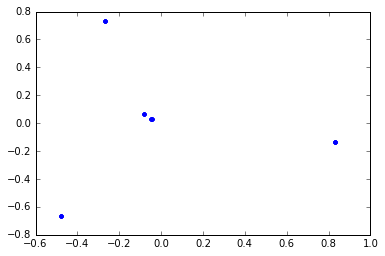

In [247]:
plt.plot(R[0,:], R[1,:], '.b')